In [1]:
import pandas as pd

json_df = pd.read_json('dim_customer.json')

json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [2]:
import pandas as pd

csv_df = pd.read_csv('fct_invoice.csv')

csv_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


EASY

1.) How many unique customers are in the dataset?

In [3]:
print(json_df['id'].nunique())

5191


2.) What are the different categories of products available? How many unique categories are there?

In [4]:
print(csv_df['category'].unique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


In [5]:
print(csv_df['category'].nunique())

8


3.) Which payment method is the most popular? How many times was it used?

In [7]:
payment_counts = csv_df['payment_method'].value_counts()
most_popular =  payment_counts.max()
most_popularpay = payment_counts.idxmax()
print(most_popularpay,":", most_popular)

Cash : 44447


MEDIUM

1.) What are the three most popular categories, by total sales?

In [8]:
csv_df['Sales'] = csv_df['price'] * csv_df['quantity']

(csv_df.groupby('category')['Sales'].sum()).sort_values(ascending = False).head(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: Sales, dtype: float64

2.) What are the total sales attributed to customers over the age of 45?

In [9]:
json_df.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


In [10]:
csv_df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [11]:
new_df = csv_df[['customer_id', 'quantity', 'price']].copy()
new_df['id'] = new_df['customer_id']

new_df = new_df.merge(json_df, how="left")
new_df.head()

,customer_id,quantity,price,id,age,first_name,gender,last_name
0,229,5,1500.40,229,NaN,William,M,Anderson
1,3433,3,1800.51,3433,34.0,Danielle,F,Rivera
2,644,1,300.08,644,46.0,Christopher,M,Stephens
3,4900,5,3000.85,4900,46.0,Laura,F,Kelly
4,1089,4,60.60,1089,NaN,Richard,M,Rhodes


In [12]:
new_df['Sales'] = new_df['price'] * new_df['quantity']
print(new_df)

       customer_id  quantity    price    id   age   first_name gender  \
0              229         5  1500.40   229   NaN      William      M   
1             3433         3  1800.51  3433  34.0     Danielle      F   
2              644         1   300.08   644  46.0  Christopher      M   
3             4900         5  3000.85  4900  46.0        Laura      F   
4             1089         4    60.60  1089   NaN      Richard      M   
...            ...       ...      ...   ...   ...          ...    ...   
99452         2344         5    58.65  2344  53.0     Michelle      F   
99453          172         2    10.46   172   NaN       Lauren      F   
99454          425         2    10.46   425  36.0         Mark      M   
99455          577         4  4200.00   577  64.0        David      M   
99456           30         3    35.19    30   NaN      Roberto      M   

      last_name     Sales  
0      Anderson   7502.00  
1        Rivera   5401.53  
2      Stephens    300.08  
3         K

In [13]:
new_df = new_df[new_df['age'] > 45]

print(new_df)

       customer_id  quantity    price    id   age   first_name gender  \
2              644         1   300.08   644  46.0  Christopher      M   
3             4900         5  3000.85  4900  46.0        Laura      F   
5              349         5  1500.40   349  64.0        Cindy      F   
9             1575         2   600.16  1575  67.0      Michael      M   
11             195         1    15.15   195  48.0      Anthony      M   
...            ...       ...      ...   ...   ...          ...    ...   
99440          639         1   300.08   639  80.0       Steven      M   
99447          538         3   107.52   538  63.0    Elizabeth      F   
99448         1749         4  2400.68  1749  54.0        James      M   
99452         2344         5    58.65  2344  53.0     Michelle      F   
99455          577         4  4200.00   577  64.0        David      M   

      last_name     Sales  
2      Stephens    300.08  
3         Kelly  15004.25  
5         Meyer   7502.00  
9       Pat

In [14]:
total_sum = new_df.sort_values('age', ascending=False)['Sales'].sum()
print(total_sum)

82039768.14999999


In [15]:
new_df['Sales'].sum()

82039768.15

3.) How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [16]:
import pandas as pd 

csv_df['invoice_date'] = pd.to_datetime(csv_df['invoice_date'])
csv_df['year'] = csv_df['invoice_date'].dt.year
csv_df['2023'] = 2023

new_df = csv_df[csv_df['year'] == 2023]
print(new_df)

/var/folders/fl/719wg4qj6qx0j0w_g7xzbjf40000gn/T/ipykernel_17461/3525018674.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  csv_df['invoice_date'] = pd.to_datetime(csv_df['invoice_date'])


      invoice_no  customer_id         category  quantity   price  \
19       I992454          562             Toys         4  143.36   
20       I183746         3047         Clothing         1  300.08   
35       I339732         3230  Food & Beverage         1    5.23   
46       I267193          187        Cosmetics         3  121.98   
51       I202367         1018            Books         3   45.45   
...          ...          ...              ...       ...     ...   
99429    I208840          358             Toys         1   35.84   
99441    I203187          154  Food & Beverage         4   20.92   
99446    I327966         1040  Food & Beverage         1    5.23   
99449    I134399           44         Clothing         1  300.08   
99450    I170504         2444            Books         1   15.15   

      payment_method invoice_date      shopping_mall   Sales  year  2023  
19              Cash   2023-07-03        Cevahir AVM  573.44  2023  2023  
20       Credit Card   2023-02-15

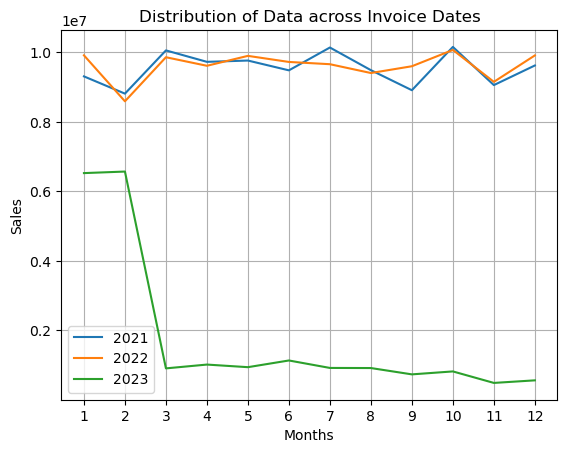

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt


csv_df['invoice_date'] = pd.to_datetime(csv_df['invoice_date'])


csv_df['year'] = csv_df['invoice_date'].dt.year 
csv_df['month'] = csv_df['invoice_date'].dt.month


monthly_sales = csv_df.groupby(['year', 'month'])['Sales'].sum().unstack().fillna(0)


fig, ax = plt.subplots() 

for year in [2021, 2022, 2023]:
    ax.plot(range(1, 13), monthly_sales.loc[year], label=str(year))

plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Distribution of Data across Invoice Dates')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()

Hard

1.) Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [18]:
new_df = csv_df[['customer_id', 'quantity', 'price','category','Sales']].copy()
new_df['id'] = new_df['customer_id']

new_df = new_df.merge(json_df, how="left")
new_df

,customer_id,quantity,price,category,Sales,id,age,first_name,gender,last_name
0,229,5,1500.40,Clothing,7502.00,229,NaN,William,M,Anderson
1,3433,3,1800.51,Shoes,5401.53,3433,34.0,Danielle,F,Rivera
2,644,1,300.08,Clothing,300.08,644,46.0,Christopher,M,Stephens
3,4900,5,3000.85,Shoes,15004.25,4900,46.0,Laura,F,Kelly
4,1089,4,60.60,Books,242.40,1089,NaN,Richard,M,Rhodes
...,...,...,...,...,...,...,...,...,...,...
99452,2344,5,58.65,Souvenir,293.25,2344,53.0,Michelle,F,Stevens
99453,172,2,10.46,Food & Beverage,20.92,172,NaN,Lauren,F,Perkins
99454,425,2,10.46,Food & Beverage,20.92,425,36.0,Mark,M,Pham
99455,577,4,4200.00,Technology,16800.00,577,64.0,David,M,Williams


In [19]:
bins = range(0,100,10)


labels = [f'{start}-{end-1}' for start, end in zip(bins, bins[1:])]


new_df['age_group'] = pd.cut(new_df['age'], bins=bins, labels=labels, right=False)


new_df

,customer_id,quantity,price,category,Sales,id,age,first_name,gender,last_name,age_group
0,229,5,1500.40,Clothing,7502.00,229,NaN,William,M,Anderson,NaN
1,3433,3,1800.51,Shoes,5401.53,3433,34.0,Danielle,F,Rivera,30-39
2,644,1,300.08,Clothing,300.08,644,46.0,Christopher,M,Stephens,40-49
3,4900,5,3000.85,Shoes,15004.25,4900,46.0,Laura,F,Kelly,40-49
4,1089,4,60.60,Books,242.40,1089,NaN,Richard,M,Rhodes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
99452,2344,5,58.65,Souvenir,293.25,2344,53.0,Michelle,F,Stevens,50-59
99453,172,2,10.46,Food & Beverage,20.92,172,NaN,Lauren,F,Perkins,NaN
99454,425,2,10.46,Food & Beverage,20.92,425,36.0,Mark,M,Pham,30-39
99455,577,4,4200.00,Technology,16800.00,577,64.0,David,M,Williams,60-69


In [20]:
pivot_table = new_df.pivot_table(index='age_group', columns='category', values='Sales', aggfunc='sum')
print(pivot_table) 

category      Books     Clothing  Cosmetics  Food & Beverage       Shoes  \
age_group                                                                  
0-9            0.00         0.00       0.00             0.00        0.00   
10-19      12801.75   1927413.84  109619.36         13582.31   993281.35   
20-29      79461.75  10250732.80  605915.32         73491.96  5924878.24   
30-39      84143.10  11354126.96  723544.70         87246.86  7200839.66   
40-49      87203.40  11215189.92  665034.96         89553.29  7025590.02   
50-59      74962.20  10321851.76  587780.96         72425.04  5852857.84   
60-69      80476.80  10660642.08  649990.76         80976.09  5978893.54   
70-79      54827.85   7769371.28  419082.62         55050.98  4480269.05   
80-89      26664.00   4493698.00  254531.60         31332.93  2628744.60   

category   Souvenir  Technology       Toys  
age_group                                   
0-9            0.00         0.0       0.00  
10-19      12375.15   112980